# [readme] composapy

DataLabs comes pre-installed with composapy, a python package that integrates and binds with the c# project.

## Setup


In [ ]:
from composapy.session import Session
from composapy.dataflow.api import DataFlow

### Start a session

```python
class Session(api_token: str, uri: str = None)
```

Composapy looks for the environment variable `APPLICATION_URI` by default (set by DataLabs).

In [3]:
session = Session("<your-api-token-here>")

If you are using Composapy outside of the datalabs environment and the `APPLICATION_URI`
environment variable is not set, you can set it with keyword argument `uri`.

In [ ]:
session = Session("<your-api-token-here>", uri="http://localhost/CompAnalytics/")

### DataFlow API

```python
class DataFlow(session: Session)
```

In [4]:
dataflow_api = DataFlow(session)

Also, if you want to interface with <a href="https://github.com/pythonnet/pythonnet" target="_blank">pythonnet</a> more closely -- you can find our csharp documentation <a href="https://dev.composable.ai/api/CompAnalytics.Contracts.html" target="_blank">here</a>.

## Run a DataFlow (Example)

_simple-dataflow.json_

![simple-dataflow.json](https://raw.githubusercontent.com/ComposableAnalytics/Docs/master/docs/DataLabs/img/DataLabs_Readme_Example_Dataflow.png)
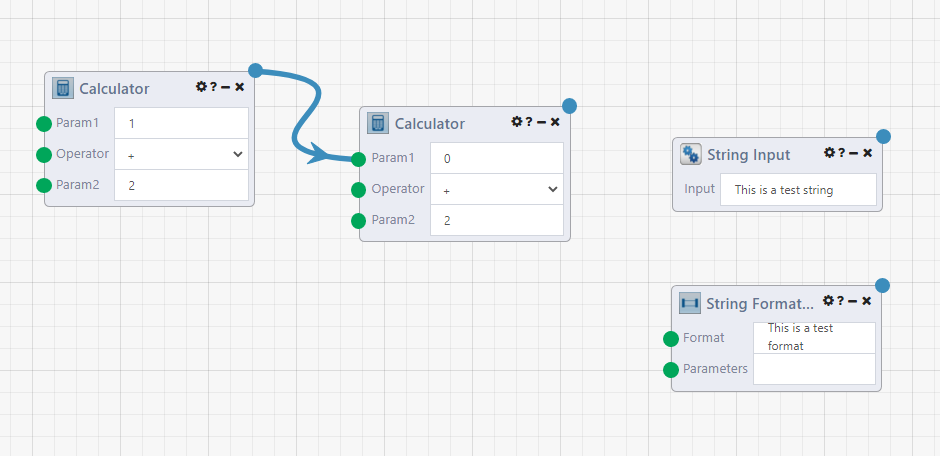

### Setup

Create a new DataFlowObject with dataflow_api.

In [ ]:
new_dataflow_object = dataflow_api.create(file_path="simple-dataflow.json")

print(new_dataflow_object)

```shell
DataFlowObject(id=None)
```

Notice that simple_dataflow_object does not have an id. In order to set the id, you can call `DataFlowObject`'s save method. Note, you do **not** need to save a `DataFlowObject` to call it's run method.

In [ ]:
saved_dataflow_object = new_dataflow_object.save()
dataflow_id = saved_dataflow_object.id  # for tutorial convenience

print(saved_dataflow_object)

```shell
DataFlowObject(id=206777)  # your id will be different
```

### DataFlowObject

You can retrieve a `DataFlowObject` by using the `DataFlow` api to retrieve a saved dataflow.

```python
$ dataflow_api.get(id: int) -> DataFlowObject
```

In [ ]:
dataflow_object = dataflow_api.get(dataflow_id)

for module in dataflow_object.modules:
    print(module)

```shell
Module(name='Calculator', type=Calculator)
Module(name='Calculator', type=Calculator)
Module(name='String Input', type=String Input)
Module(name='String Formatter', type=String Formatter)
Module(name='String Formatter 2', type=String Formatter)
```

In [ ]:
for module in dataflow_object.modules:
    for module_input in module.inputs:
        print(module_input)

```python
Input(name=Param1, type=Double, value=1.0)
Input(name=Operator, type=String, value='+')
Input(name=Param2, type=Double, value=2.0)
Input(name=Param1, type=Double, value=0.0)
Input(name=Operator, type=String, value='+')
Input(name=Param2, type=Double, value=2.0)
Input(name=Input, type=String, value='This is a test string')
Input(name=Format, type=String, value='This is a test format')
Input(name=Parameters, type=List<Object>, value=None)
Input(name=Format, type=String, value='This is a bad format')
Input(name=Parameters, type=List<Object>, value=None)
```

### Run DataFlowObject
```python
$ dataflow_object.run() -> DataFlowRun
```

In [ ]:
dataflow_run = dataflow_object.run()

for module in dataflow_run.modules:
    for module_result in module.results:
        print(module_result)

```python
Result(name='Result', type=Double, value=3.0)
Result(name='Result', type=Double, value=5.0)
Result(name='Result', type=String, value='This is a test string')
Result(name='Result', type=String, value='This is a test format')
Result(name='Result', type=String, value='This is a bad format')
```

Instead of retrieving a `DataFlowObject` and calling it's run method, you can instead run a saved dataflow using the `DataFlow` api.
```python
$ dataflow_api.run(id: int) -> DataFlowRun
```

In [ ]:
dataflow_run = dataflow_api.run(dataflow_id)

for module in dataflow_run.modules:
    for module_result in module.results:
        print(module_result)

```python
Result(name='Result', type=Double, value=3.0)
Result(name='Result', type=Double, value=5.0)
Result(name='Result', type=String, value='This is a test string')
Result(name='Result', type=String, value='This is a test format')
Result(name='Result', type=String, value='This is a bad format')
```

### External Inputs

[External module](https://github.com/ComposableAnalytics/Docs/blob/master/docs/DataFlows/06.DataFlow-Reuse.md#creation) inputs can be passed to your dataflow by using the `external_inputs` keyword argument in `run`.

```python
$ dataflow_api.run(id: int, external_inputs: Dict[str, any]) -> DataFlowRun
```

In [ ]:
dataflow_api.run(123456, parameters={
    "external_string_input_name": "string",
    "external_int_input_name": 3
})

## Filtering/Retrieving

In [ ]:
from composapy.dataflow.models import ModuleSet, InputSet, ResultSet

```python
$ dataflow_object.modules -> ModuleSet
$ dataflow_run.modules -> ModuleSet
$ modules.inputs -> InputSet
$ modules.results -> ResultSet
```

Set objects (`ModuleSet`/`InputSet`/`ResultSet`) all have the following available behaviors.

```python
x.filter(key=value)
```

---

Return all keys with value as a set.

In [ ]:
calculator_modules = dataflow_run.modules.filter(name="Calculator")
for module in calculator_modules:
    print(module)

```python
Module(name='Calculator', type=Calculator)
Module(name='Calculator', type=Calculator)
```

```python
x.get(key=value)
```

---

Return expects exactly one key with result, otherwise will raise exception.
- `FoundMultipleError`
- `NoneFoundError`

In [ ]:
dataflow_run.modules.get(name="String Input")

```python
Module(name='String Input', type=String Input)
```

In [ ]:
dataflow_run.modules.get(name="String Input").results.get(value="This is a test string")

```python
Result(name='Result', type=String, value='This is a test string')
```

```python
x[index]
```

---

Indexing works as you would expect it to.

In [ ]:
dataflow_run.modules[3]

```python
Module(name='String Formatter', type=String Formatter)
```

```python
x.first()
```

---

For convenience, instead of accessing with an index, you can also get the first result of any set with the first method.

In [ ]:
dataflow_run.modules.first()

```python
Module(name='Calculator', type=Calculator)
```

```python
dataflow_object.module, module.result, module.input  # singular nouns
```

---

Instead of accessing `results` and using `first()` or `[0]`, you can instead use `result`. This works for `module`, `result` and `input`. Attempts to use these when there are more than one will raise an exception.

In [ ]:
dataflow_run.modules.get(name="String Formatter").result

```python
Result(name='Result', type=String, value='This is a test format')
```

## Object Members/Properties

Most commonly used member properties (`name`/`type`/`value`) can be accessed as python object properties.

In [ ]:
dataflow_run.modules.get(name="String Formatter").results.first().value

```python
'This is a test format'
```

### Contract

If you need to interact more closely with Composable object types, the c#/python binding contracts can be accessed on composapy objects thru the `contract` member.

In [ ]:
type(dataflow_run.contract)

```python
CompAnalytics.Contracts.ExecutionState
```

In [ ]:
type(dataflow_run.modules.get(name="String Formatter")).contract

```python
CompAnalytics.Contracts.Module
```

In [ ]:
type(dataflow_run.modules.get(name="String Formatter")).results.first().contract

```python
CompAnalytics.Contracts.ModuleOutput
```

## Tables

In [ ]:
import pandas as pd
from CompAnalytics.Contracts.Tables import Table

For convenience, `Result` objects that contain Composable tables are displayed as a Pandas dataframe inside of notebooks (the object is still a `Result` object, and the member `value` will still be a `Table` contract).

In [ ]:
table_run = dataflow_api.get_run(138123)

table_run.modules.first().result

In [ ]:
+----+-----+-----+-----+
|    | a   | o   | e   |
+====+=====+=====+=====+
|  0 | a   | o   | e   |
+----+-----+-----+-----+
|  1 | e   |     |     |
+----+-----+-----+-----+
|  2 | e   |     |     |
+----+-----+-----+-----+

To get the pandas dataframe `Result` of a Composable Table, use `result.to_pandas()`.

In [ ]:
result_df = table_run.modules.first().result.to_pandas()
print(isinstance(df, pd.DataFrame))

```python
True
```

In [ ]:
result_value = table_run.modules.first().result.value
print(isinstance(result_value, pd.DataFrame))

```python
False
```

In [ ]:
print(isinstance(result_value, Table))

```python
True
```

## File References

In [ ]:
from composapy.helper import file_ref

For dataflows that contain values of type `Contracts.FileReference`, the result value gives you the object with some information needed to retrieve the information of your file. Instead of accessing the `value` property, you can use the `to_file` method to download the file to your local workspace.

```python
$ x.result.to_file(save_dir: str, file_name: str = None)
```

In [ ]:
run = dataflow_api.get_run(654321)
run.modules.first().result.to_file("relative/path/to/dir", file_name="optional_name.txt")  # file_name uses original file name if kwargs are not specified